# Cancer Classification by Analysis of RNA-seq

### Link to Dataset
### https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



In [2]:
#Data reading
data = pd.read_csv('./data.csv',delimiter=',')
labels=pd.read_csv('./labels.csv',delimiter=',')

### Exploratory Data Analysis

In [3]:
data.shape

(801, 20532)

In [4]:
labels.head(10)

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
5,sample_5,PRAD
6,sample_6,KIRC
7,sample_7,PRAD
8,sample_8,BRCA
9,sample_9,PRAD


In [5]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [6]:
labels.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


In [7]:
df = pd.DataFrame(data)
JoinedDF=df.join(labels.set_index('Unnamed: 0'), on='Unnamed: 0')
JoinedDF
X=JoinedDF.iloc[:,1:-2]
Y=JoinedDF.iloc[:,-1]


# replacing string labels with numerical values
Y = Y.replace({'PRAD':0})
Y = Y.replace({'LUAD': 1})
Y = Y.replace({'BRCA': 2})
Y = Y.replace({'KIRC': 3})
Y = Y.replace({'COAD': 4})

In [8]:
# Replace zeroes with mean of the particular column
zero_not_accepted = []
for i in range(20530):
    val='gene_'+str(i)
    zero_not_accepted.append(val)
    
for column in zero_not_accepted:
    X[column] = X[column].replace(np.NaN,0)
    mean = float(X[column].mean(skipna=True))
    X[column] = X[column].replace(0, mean)


### Feature Selection

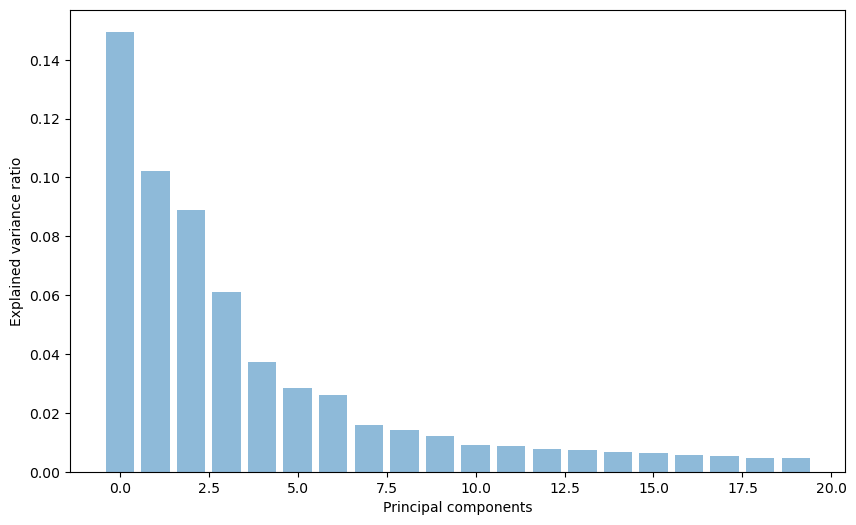

In [9]:
pca = PCA(n_components=20)
X = pca.fit_transform(X)
pca.explained_variance_ratio_
# plot the explained variance using a barplot
plt.figure(figsize=(10, 6))
plt.bar(range(20), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

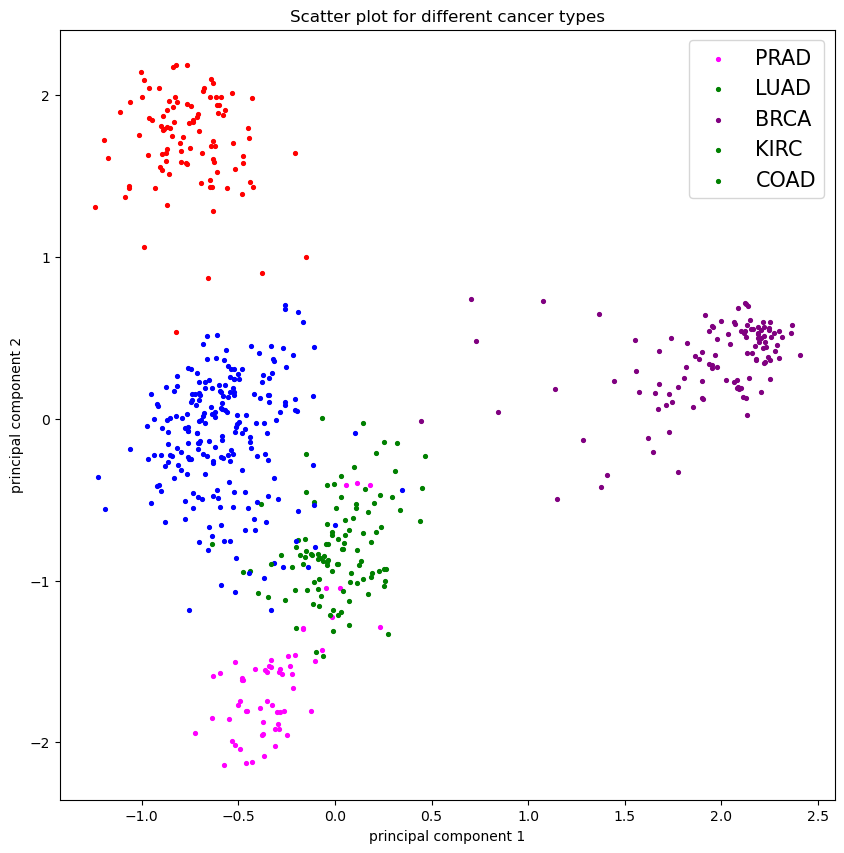

In [12]:
# the below plot is just for visualization purpose
# the plot confirms that there are 5 different easily seperable clusters on a 2D plane
y=Y_train.values
plt.figure(1,figsize=(10,10))
for i in range(len(X_train)):
    if y[i] == 0:
        col='red'
    elif y[i]==1:
        col='green'
    elif y[i]==2:
        col='blue'
    elif y[i]==3:
        col='purple'
    elif y[i]==4:
        col='magenta'
    else:
        col='black'
    plt.scatter(X_train[i][0], X_train[i][1], color= col,
            marker= ".", s=30)
    
# x-axis label
plt.xlabel('principal component 1')
# frequency label
plt.ylabel('principal component 2')
# plot title
plt.title('Scatter plot for different cancer types')
plt.legend(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], prop={"size":15})

# function to show the plot
plt.show()

### Model Selection

#### Naive bayes

Accuracy for Naive Bayes: 0.990050


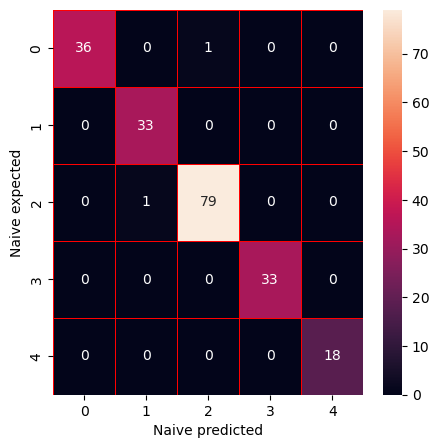

In [20]:
# training a Naive Bayes classifier
gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
Naive_accuracy = gnb.score(X_test, Y_test)
Naivecm = confusion_matrix(Y_test, gnb_predictions)
print("Accuracy for Naive Bayes: %f"% (Naive_accuracy))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(Naivecm,annot = True, linewidths=0.5,linecolor = "red",fmt = ".0f",ax = ax)
plt.xlabel("Naive predicted")
plt.ylabel("Naive expected")
plt.show()

In [21]:
print('\nClassification Report: Naive Bayes\n')
print(classification_report(Y_test, gnb_predictions, target_names=['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']))
NBreport = classification_report(Y_test, gnb_predictions, output_dict=True)


Classification Report: Naive Bayes

              precision    recall  f1-score   support

        PRAD       1.00      0.97      0.99        37
        LUAD       0.97      1.00      0.99        33
        BRCA       0.99      0.99      0.99        80
        KIRC       1.00      1.00      1.00        33
        COAD       1.00      1.00      1.00        18

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201



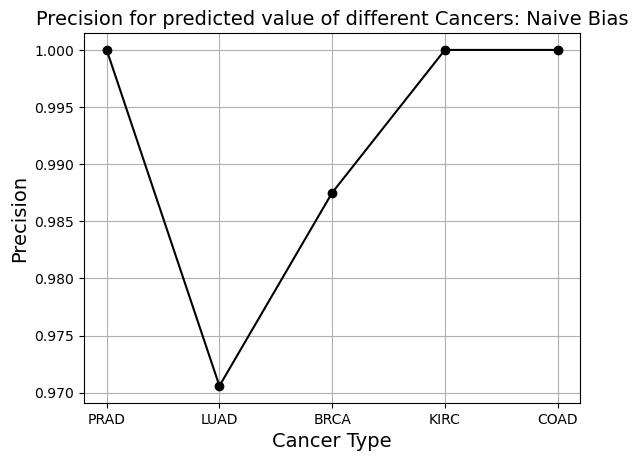

In [22]:
Class = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
NBLine = [NBreport['0']['precision'] , NBreport['1']['precision'] , NBreport['2']['precision'] , NBreport['3']['precision'] , NBreport['4']['precision']]
plt.plot(Class, NBLine, color='black', marker='o')
plt.title('Precision for predicted value of different Cancers: Naive Bias', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

#### KNN

D:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to

Accuracy for KNN classifier: 0.940299


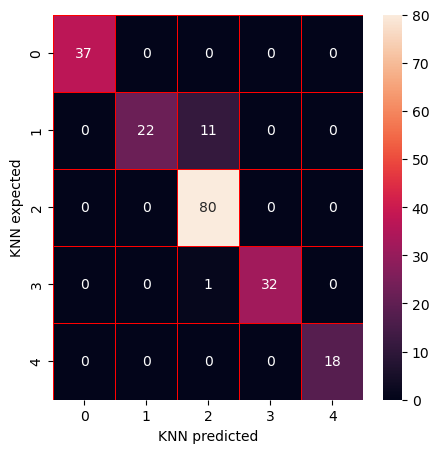

In [25]:
# training a KNN model
Classifier = KNeighborsClassifier(n_neighbors=128)
Classifier.fit(X_train, Y_train)
ypredicted = Classifier.predict(X_test)
KNN_accuracy=Classifier.score(X_test,Y_test)
print("Accuracy for KNN classifier: %f"% (KNN_accuracy))
KNNcm = confusion_matrix(Y_test, ypredicted)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(KNNcm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("KNN predicted")
plt.ylabel("KNN expected")
plt.show()

In [26]:
print('\nClassification Report: KNN\n')
print(classification_report(Y_test, ypredicted, target_names=['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']))
KNNreport = classification_report(Y_test, ypredicted, output_dict=True)


Classification Report: KNN

              precision    recall  f1-score   support

        PRAD       1.00      1.00      1.00        37
        LUAD       1.00      0.67      0.80        33
        BRCA       0.87      1.00      0.93        80
        KIRC       1.00      0.97      0.98        33
        COAD       1.00      1.00      1.00        18

    accuracy                           0.94       201
   macro avg       0.97      0.93      0.94       201
weighted avg       0.95      0.94      0.94       201



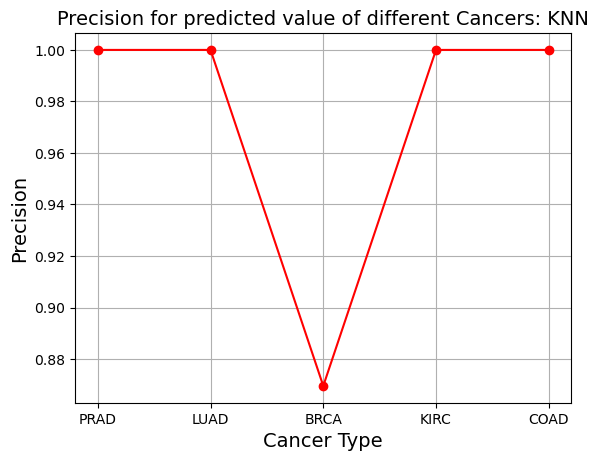

In [27]:
KNNLine = [KNNreport['0']['precision'] , KNNreport['1']['precision'] , KNNreport['2']['precision'] , KNNreport['3']['precision'] , KNNreport['4']['precision']]
plt.plot(Class, KNNLine, color='red', marker='o')
plt.title('Precision for predicted value of different Cancers: KNN', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

Accuracy for Random Forest: 0.995025


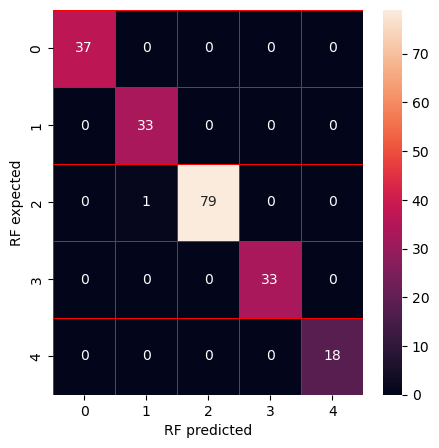

In [28]:
# Training a Random Forest Classifier
RF = RandomForestClassifier(n_estimators = 100) 
RF.fit(X_train, Y_train)
y_pred = RF.predict(X_test)
RF_accuracy = RF.score(X_test,Y_test)
print("Accuracy for Random Forest: %f"% (RF_accuracy))
RFcm = confusion_matrix(Y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(RFcm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("RF predicted")
plt.ylabel("RF expected")
plt.show()

In [29]:
print('\nClassification Report: Random Forest\n')
print(classification_report(Y_test, y_pred, target_names=['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']))
RFreport = classification_report(Y_test, y_pred, output_dict=True)


Classification Report: Random Forest

              precision    recall  f1-score   support

        PRAD       1.00      1.00      1.00        37
        LUAD       0.97      1.00      0.99        33
        BRCA       1.00      0.99      0.99        80
        KIRC       1.00      1.00      1.00        33
        COAD       1.00      1.00      1.00        18

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



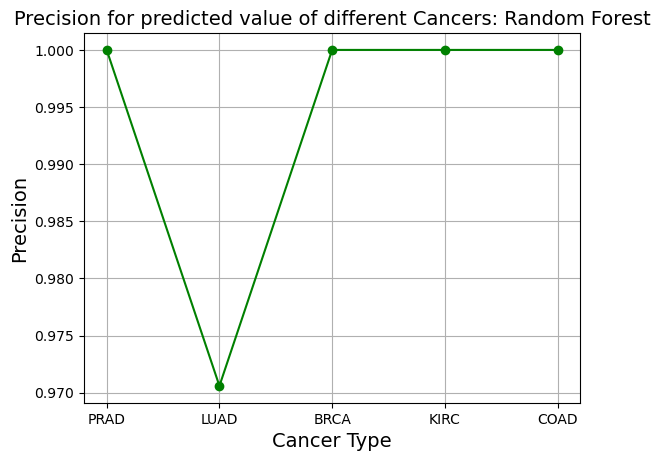

In [30]:
RFLine = [RFreport['0']['precision'] , RFreport['1']['precision'] , RFreport['2']['precision'] , RFreport['3']['precision'] , RFreport['4']['precision']]
plt.plot(Class, RFLine, color='green', marker='o')
plt.title('Precision for predicted value of different Cancers: Random Forest', fontsize=14)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()